# Calculate the porphyrin dimensions

In [2]:
from math import cos, radians

def average(num_1, num_2 = None):
    if type(num_1) is list:
        return sum(num_1) / len(num_1)
    else:
        if num_2 is not None:
            numbers = [num_1, num_2]
            average = sum(numbers) / len(numbers)
            return average
        else:
            return num_1

# chemical dimensions in Angstroms (as the averages from https://en.wikipedia.org/wiki/Bond_length) and degrees
chemical_dimensions = {
    'bond':{
        'c-c':average(1.2,1.54),
        'c-h':average(1.06,1.12),
        'c-n':average(1.47,2.1),
        'c-f':average(1.34),
        'n=n':average(1.23) # https://doi.org/10.1016/B978-0-08-101033-4.00003-6
    },
    'angle':{
        'sp3':109.5,
        'sp2':120
    }
}

# abbreviate dimensions
cc_bond = chemical_dimensions['bond']['c-c']
cn_bond = chemical_dimensions['bond']['c-n']
mostly_forward_sp2 = cos(radians(chemical_dimensions['angle']['sp2']-90))
less_forward_sp2 = cos(radians(180-chemical_dimensions['angle']['sp2']))

# calculate the total molecular length & width
center_porphyrin_length = (cc_bond*(3*mostly_forward_sp2 + less_forward_sp2))
sp2_extension = (cc_bond * (2 + less_forward_sp2) + cn_bond * (1 + less_forward_sp2))
total_length = sp2_extension + center_porphyrin_length
print(total_length, 'Angstroms')

10.346864409554044 Angstroms


# Define and execute the solution simulation

refinement loop:  0
refinement loop:  614
refinement loop:  634
refinement loop:  648
refinement loop:  665


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,oxidation,inactivation
time (hr),,
0.050209,0.124589,0.252856
0.100418,0.233659,0.799619
0.150628,0.329141,0.960443
0.200837,0.412728,0.988929
0.251046,0.485901,0.995952
...,...,...
11.799163,1.000000,1.000000
11.849372,1.000000,1.000000
11.899582,1.000000,1.000000


hours to target: 3.5648535564853554
--> ERROR: The prediction of 3.5648535564853554 is not within the 1.0+/-0.5 tolerance of the actual value.





refinement loop:  0
refinement loop:  862
refinement loop:  876
refinement loop:  893
refinement loop:  912


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,oxidation,inactivation
time (hr),,
0.050209,0.232368,0.759897
0.100418,0.410748,0.988762
0.150628,0.547681,0.998449
0.200837,0.652794,0.999622
0.251046,0.733481,0.999874
...,...,...
11.799163,1.000000,1.000000
11.849372,1.000000,1.000000
11.899582,1.000000,1.000000


hours to target: 1.4560669456066946
The prediction of 1.4560669456066946 is within the 1.0+/-0.5 tolerance of the actual value.





refinement loop:  0
refinement loop:  964
refinement loop:  982
refinement loop:  1001
refinement loop:  1019


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,oxidation,inactivation
time (hr),,
0.050209,0.406842,0.985568
0.100418,0.648176,0.999708
0.150628,0.791322,0.999971
0.200837,0.876228,0.999994
0.251046,0.926588,0.999998
...,...,...
11.799163,1.000000,1.000000
11.849372,1.000000,1.000000
11.899582,1.000000,1.000000


hours to target: 0.602510460251046
The prediction of 0.602510460251046 is within the 1.0+/-0.5 tolerance of the actual value.







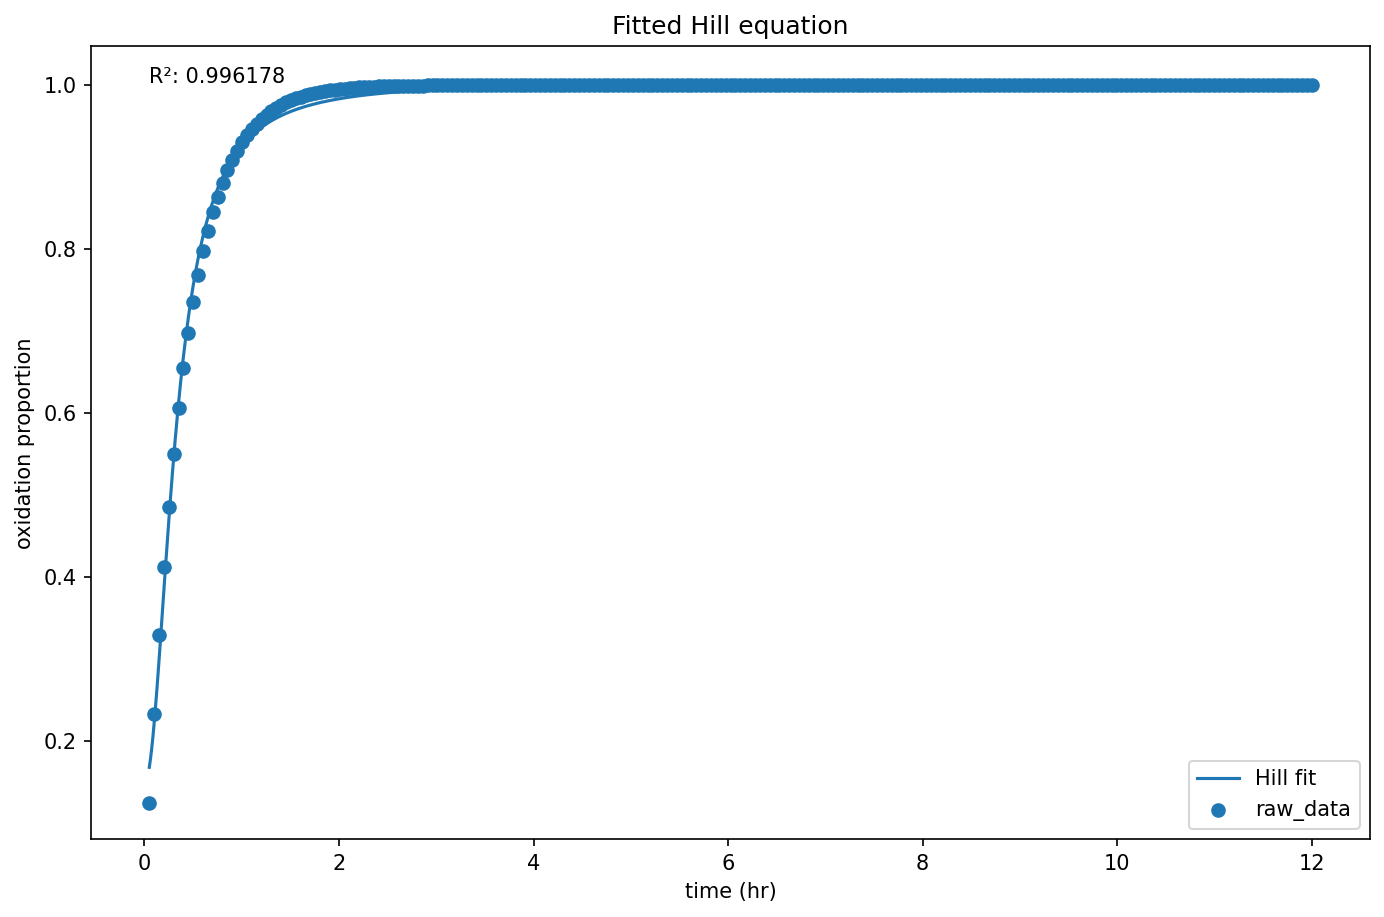

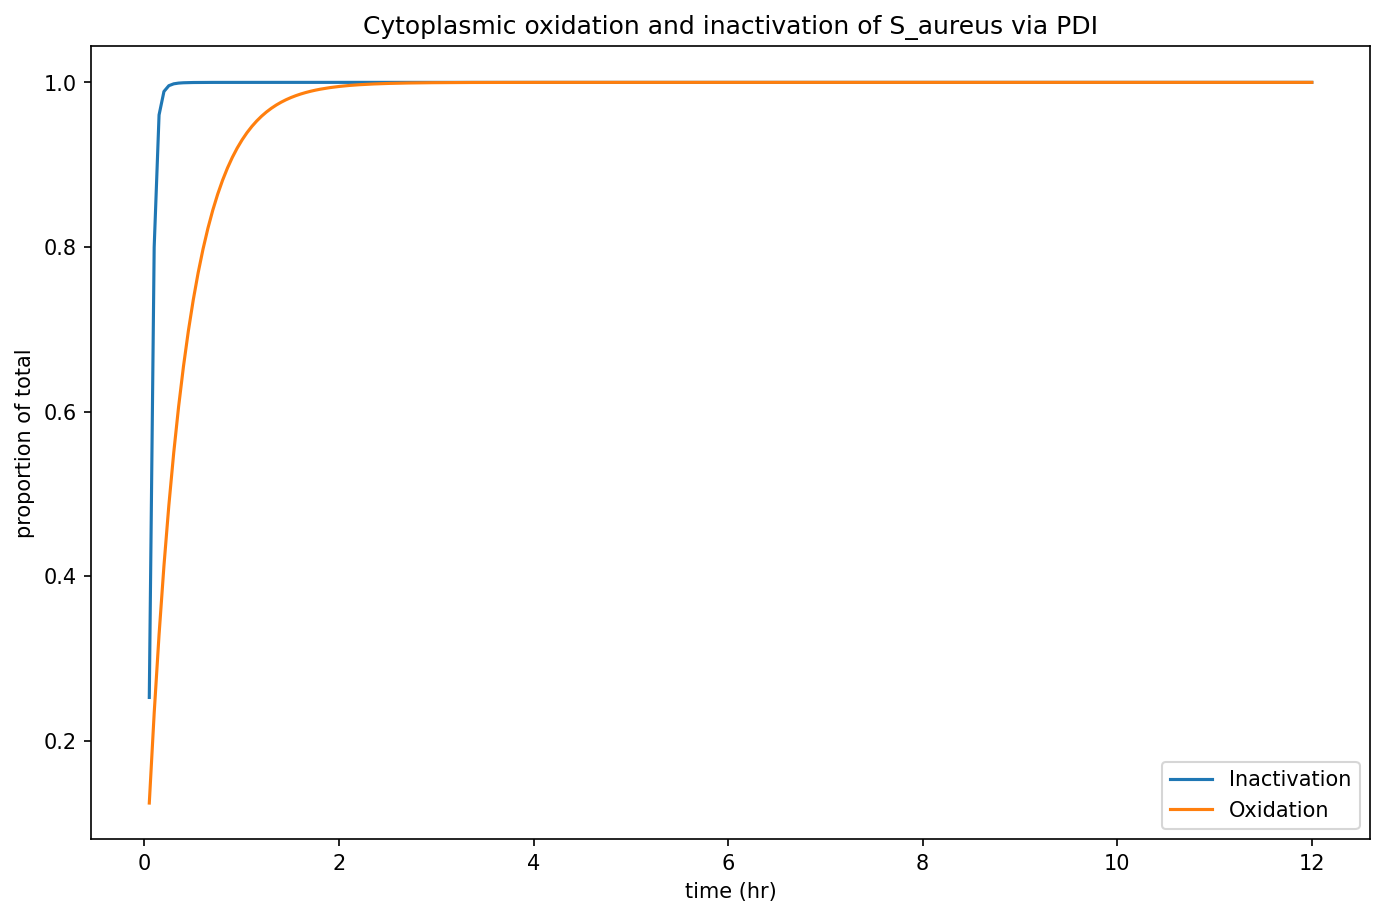

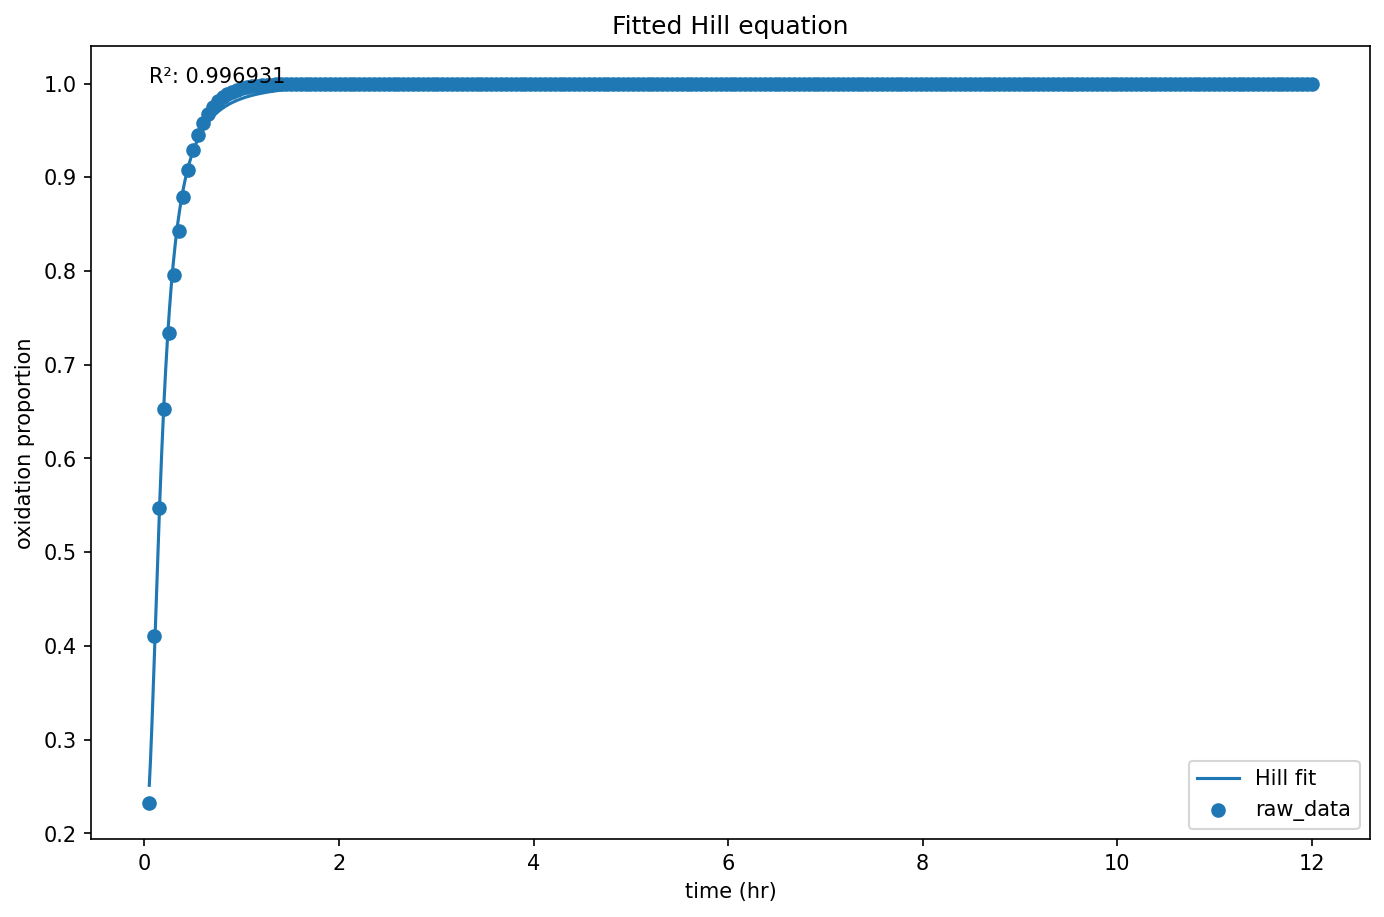

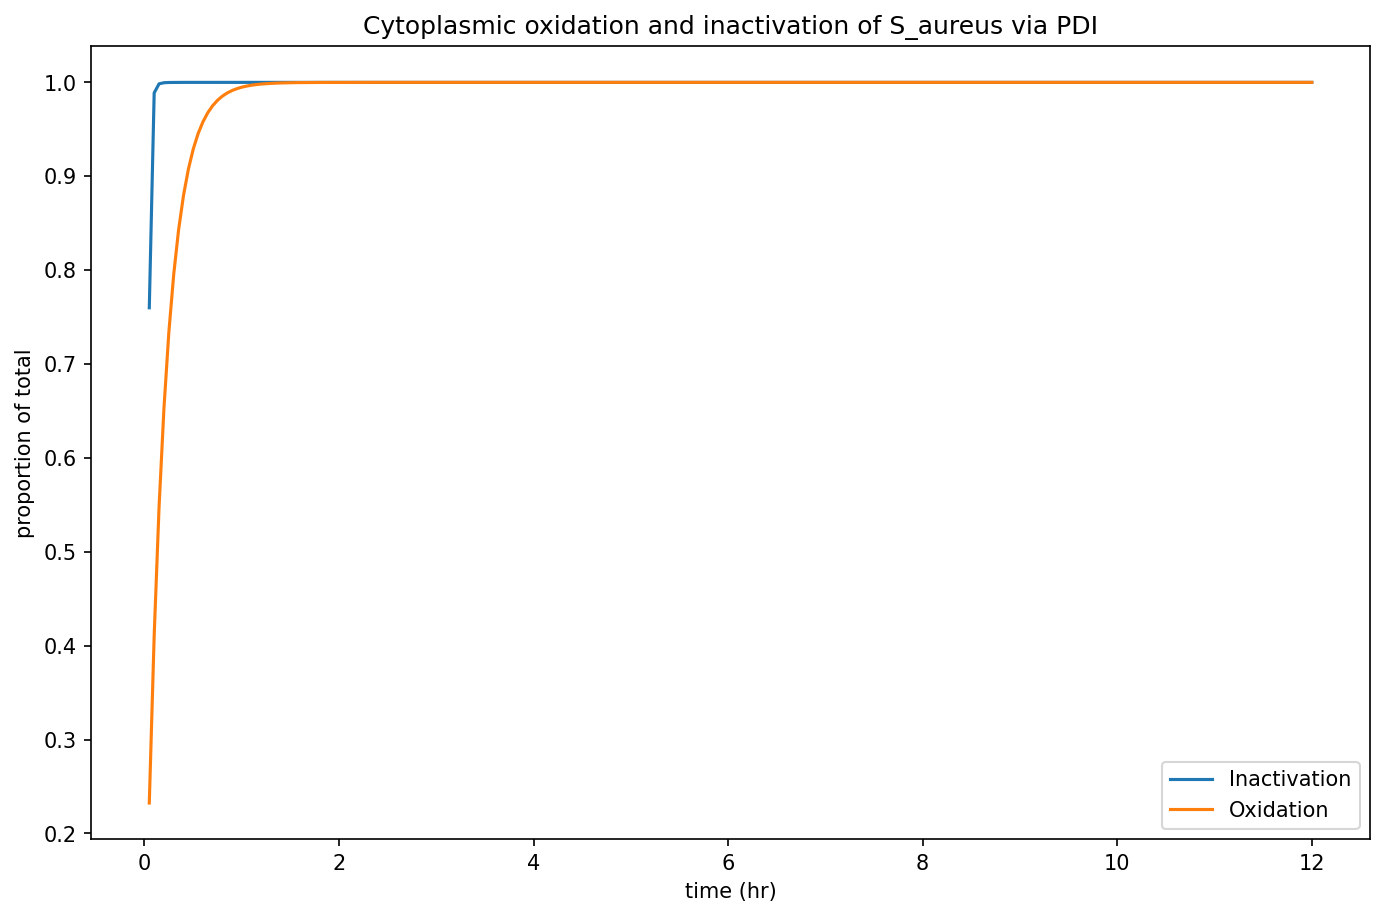

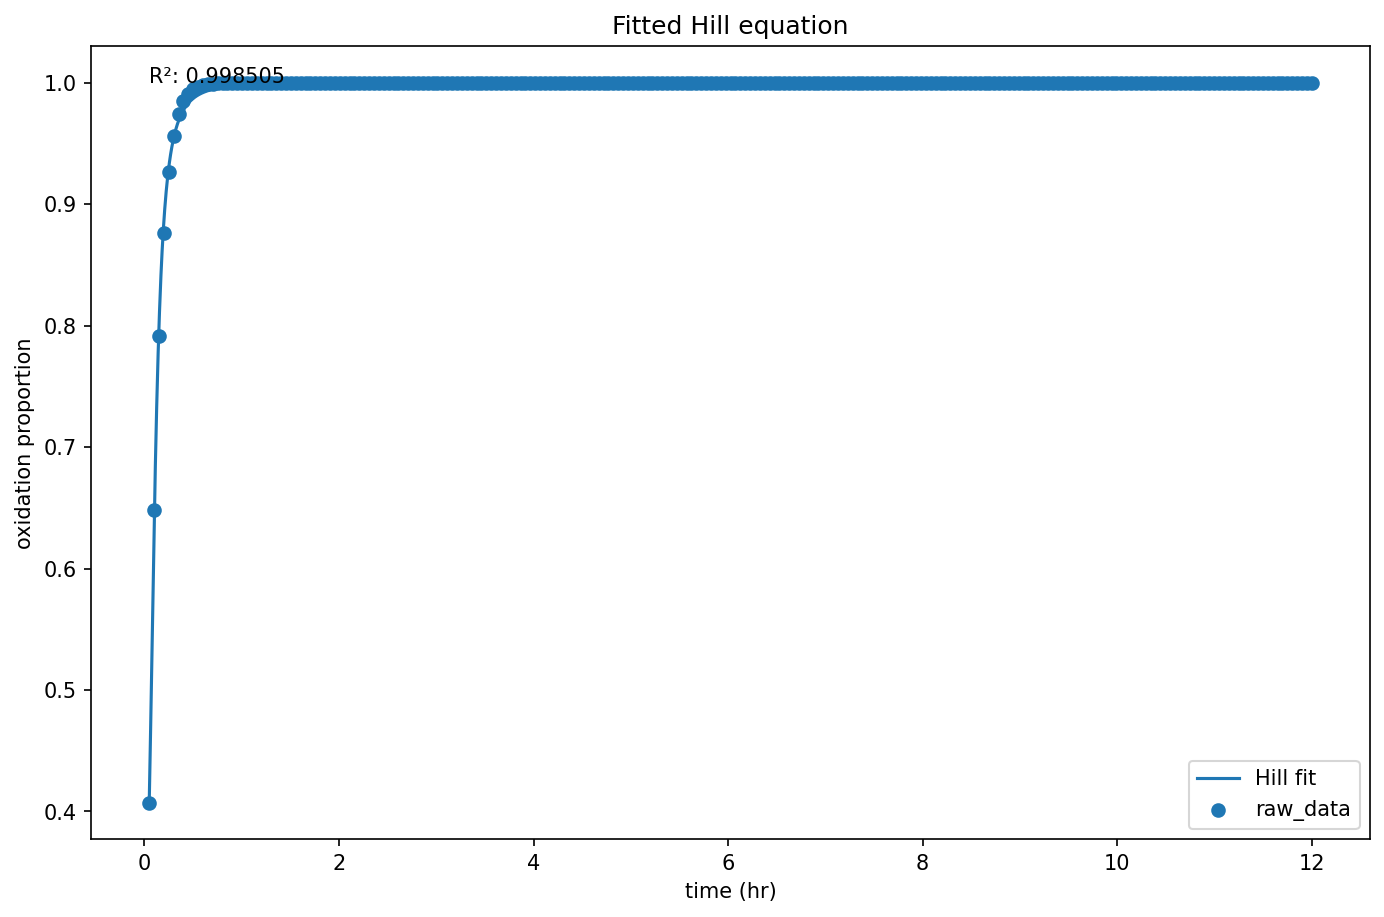

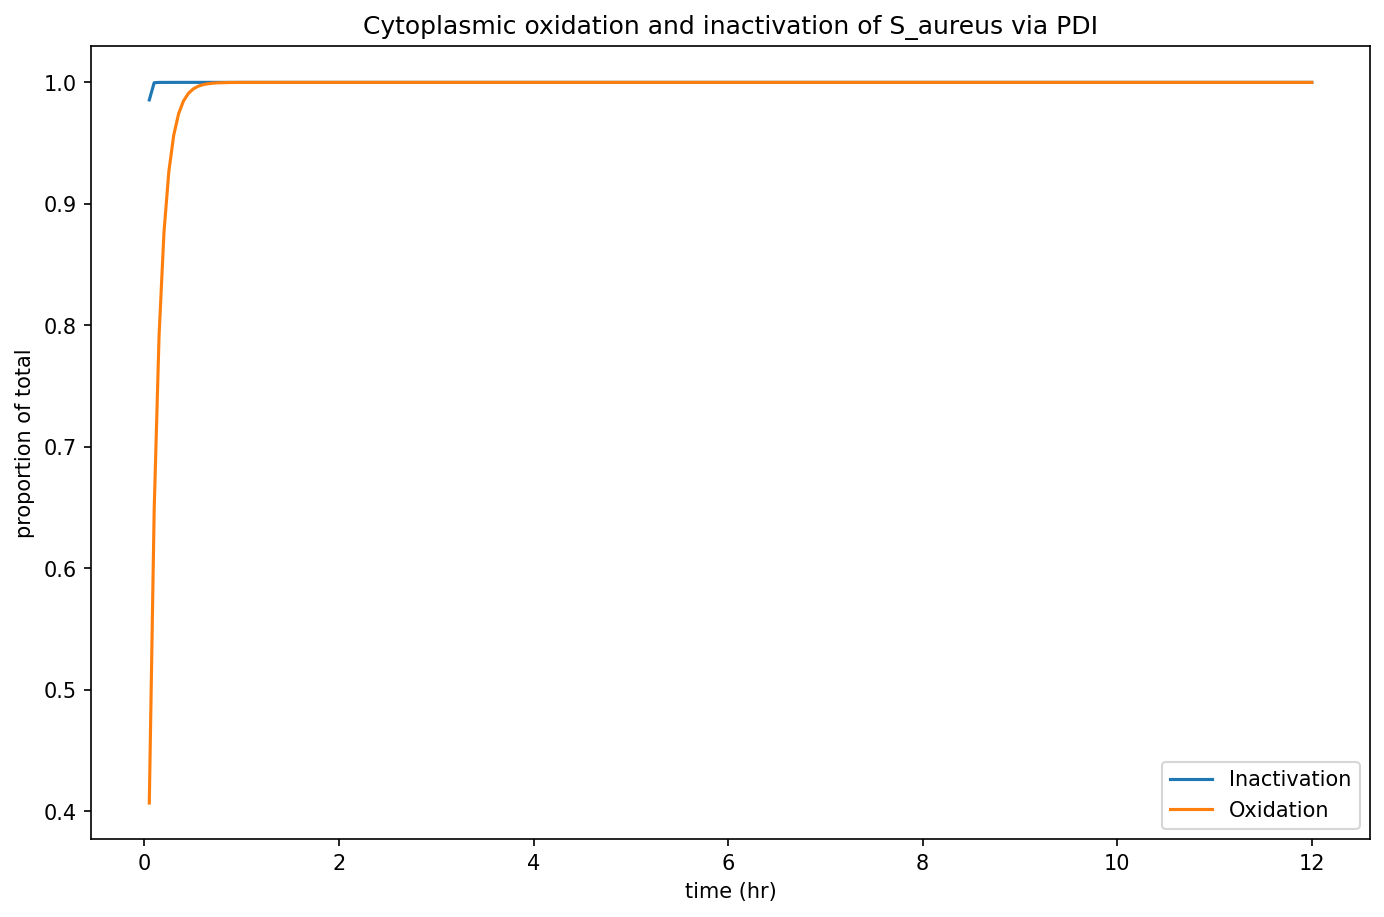

In [6]:
from scipy.constants import micro
from uncertainties import ufloat
%run ../../pdipy/core.py
%matplotlib inline

# define photosensitizer parameters
photosensitizer = {
    'name': '5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide',
    'mw': {
        'value':1186.462   # mass with iodides included, sans iodides 678.84,
    },
    'dimensions':{
        'length (A)': total_length,
        'width (A)': total_length,
        'depth (A)': 1.5,
        'shape': 'disc',
    }
}

# define the light parameters
irradiance = 4
light_source = {
    'name': 'OSRAM 2\' 18W/840 lamps',
    "visible_proportion": {
      "value": (700-390)/(700-380),
    }
}


# define general parameters
verbose = False
jupyter = True
bacterial_cfu_ml = 1E8
total_time = 720
bacterial_specie = 'S_aureus'
photosensitizer_molars = [5*micro, 10*micro, 20*micro]

# execute the simulation
target_reduction = 1-10**(-7.6)
for photosensitizer_molar in photosensitizer_molars:
    export_name = f'Beirao_et_al, {int(photosensitizer_molar/micro)} uM solution'
    
    pdi = PDIBacterialPkg(verbose, jupyter)
    pdi.define_system(total_time, bacterial_cfu_ml = bacterial_cfu_ml)
    pdi.define_bacterium(bacterial_specie)
    pdi.define_photosensitizer(photosensitizer, photosensitizer_molar)
    pdi.define_light(light_source, irradiance)
    pdi.singlet_oxygen_calculations()
    pdi.kinetic_calculation()
    processed_data = pdi.data_processing()
    pdi.export(export_name)
    display(processed_data)

    # affirm the accuracy of the prediction
    value, unit = pdi.data_parsing(target_reduction)    
    if value is not None:
        actual_value = 1
        tolerance = actual_value*0.5
        acceptable_range = [actual_value-tolerance, actual_value+tolerance]
        acceptable_range_float = ufloat(actual_value, tolerance)
        if acceptable_range[0] < value < acceptable_range[1]:
            print(f'The prediction of {value} is within the {acceptable_range_float} tolerance of the actual value.')
        else:
            print(f'--> ERROR: The prediction of {value} is not within the {acceptable_range_float} tolerance of the actual value.')
    else:
        print('--> ERROR: The value was never observed in the simulation predictions.')
    print('\n\n\n\n')

# Define and execute the biofilm simulation

The photosensitizer dimensions as a disc = 1.0346864409554045e-09 m x 1.0346864409554045e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-28 m³
The volume proportion of 7.4E15 photosensitizers = (9.3E-13 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 3.8E-7

('photons per timestep: ', 2.6204874386697897e-06)
('molecular oxygen molecules: ', '2.8E-4')
('effective excitation watts: ', '4.3E-3')
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, b_ps, mo, so, fa, o_fa, o_eps;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*8.13949980298628e-5*0.6*ps - 121212121.212121*e_ps;
  _J1: ps => b_ps; 6.96e-10*ps;
  _J2: e_ps + mo => so + ps; 0.48*50000000*e_ps*mo;
  _J3: so => mo; 16666.6666666667*so;
  _J4: so + fa => o_fa + mo; 411.318998088254*so*fa;
  _J5: so => o_eps + mo; 31622.7766016838*so;

  // Species initializations:
  ps = 5.52017296111272e-07;
  e_ps = 4.447966

,[ps],[e_ps],[b_ps],[mo],[so],[fa],[ofa],[oeps]
Time (s),,,,,,,,
0.000000,5.000000e-06,0.000000,0.000000e+00,0.000281,0.000000e+00,6.902976e-03,0.000000,0.000000
180.753138,5.520191e-07,0.000004,6.944632e-14,0.000281,6.203652e-07,6.591825e-03,0.000311,3.545950
361.506276,5.520191e-07,0.000004,1.388926e-13,0.000281,6.203667e-07,6.294702e-03,0.000608,7.091910
542.259414,5.520191e-07,0.000004,2.083389e-13,0.000281,6.203682e-07,6.010970e-03,0.000892,10.637879
723.012552,5.520191e-07,0.000004,2.777853e-13,0.000281,6.203697e-07,5.740024e-03,0.001163,14.183856
...,...,...,...,...,...,...,...,...
42476.987448,5.520173e-07,0.000004,1.631986e-11,0.000281,6.203979e-07,1.354019e-07,0.006903,833.340333
42657.740586,5.520173e-07,0.000004,1.638930e-11,0.000281,6.203979e-07,1.292984e-07,0.006903,836.886476
42838.493724,5.520173e-07,0.000004,1.645875e-11,0.000281,6.203979e-07,1.234700e-07,0.006903,840.432618


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,parameter,value
0,simulation_path,"Beirao_et_al, biofilm, 5 uM solution-32"
1,singlet_oxygen_diffusion_distance (m),8.0000E-8
2,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
3,medium,water
4,initial_time,0.0000E0
5,total_time (s),4.3200E4
6,timestep (s),1.8000E2
7,solution_depth (m),1.2670E-2
8,solution_area (m^2),1.9300E-4
9,solution_volume (m^3),2.4453E-6


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,variable,value
0,simulation_path,"Beirao_et_al, biofilm, 5 uM solution-32"
1,fa_g/L_conc,8.4772E-1
2,fa_molar,6.9030E-3
3,photosensitizer_molar,5.0000E-6
4,photosensitizers,7.3630E15
5,molecular_volume (m^3),1.2612E-28
6,volume_proportion,3.7977E-7
7,photon_moles_per_timestep,2.6205E-6
8,dissolved_mo_molar,2.8126E-4
9,eps_oxidation,3.1623E4


None

hours to target: 9.03765690376569
9.03765690376569 hours
The prediction of 9.03765690376569 is within the 6.5+/-3.2 tolerance of the actual value.





The photosensitizer dimensions as a disc = 1.0346864409554045e-09 m x 1.0346864409554045e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-28 m³
The volume proportion of 1.5E16 photosensitizers = (1.9E-12 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 7.6E-7

('photons per timestep: ', 2.6204874386697897e-06)
('molecular oxygen molecules: ', '2.8E-4')
('effective excitation watts: ', '4.3E-3')
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, b_ps, mo, so, fa, o_fa, o_eps;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*8.13949980298628e-5*0.6*ps - 121212121.212121*e_ps;
  _J1: ps => b_ps; 6.96e-10*ps;
  _J2: e_ps + mo => so + ps; 0.48*50000000*e_ps*mo;
  _J3: so => mo; 16666.6666666667*so;
  _J4: so + fa => o_fa +

,[ps],[e_ps],[b_ps],[mo],[so],[fa],[ofa],[oeps]
Time (s),,,,,,,,
0.000000,0.000010,0.000000,0.000000e+00,0.000281,0.000000,6.902976e-03,0.000000,0.000000
180.753138,0.000001,0.000009,1.388926e-13,0.000280,0.000001,6.295980e-03,0.000607,7.076302
361.506276,0.000001,0.000009,2.777852e-13,0.000280,0.000001,5.742353e-03,0.001161,14.152639
542.259414,0.000001,0.000009,4.166778e-13,0.000280,0.000001,5.237407e-03,0.001666,21.229008
723.012552,0.000001,0.000009,5.555705e-13,0.000280,0.000001,4.776859e-03,0.002126,28.305406
...,...,...,...,...,...,...,...,...
42476.987448,0.000001,0.000009,3.263971e-11,0.000280,0.000001,2.354426e-12,0.006903,1663.016949
42657.740586,0.000001,0.000009,3.277860e-11,0.000280,0.000001,2.173239e-12,0.006903,1670.093625
42838.493724,0.000001,0.000009,3.291750e-11,0.000280,0.000001,2.006447e-12,0.006903,1677.170300


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,parameter,value
0,simulation_path,"Beirao_et_al, biofilm, 10 uM solution-24"
1,singlet_oxygen_diffusion_distance (m),8.0000E-8
2,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
3,medium,water
4,initial_time,0.0000E0
5,total_time (s),4.3200E4
6,timestep (s),1.8000E2
7,solution_depth (m),1.2670E-2
8,solution_area (m^2),1.9300E-4
9,solution_volume (m^3),2.4453E-6


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,variable,value
0,simulation_path,"Beirao_et_al, biofilm, 10 uM solution-24"
1,fa_g/L_conc,8.4772E-1
2,fa_molar,6.9030E-3
3,photosensitizer_molar,1.0000E-5
4,photosensitizers,1.4726E16
5,molecular_volume (m^3),1.2612E-28
6,volume_proportion,7.5954E-7
7,photon_moles_per_timestep,2.6205E-6
8,dissolved_mo_molar,2.8126E-4
9,eps_oxidation,3.1623E4


None

hours to target: 6.326359832635983
6.326359832635983 hours
The prediction of 6.326359832635983 is within the 6.5+/-3.2 tolerance of the actual value.





The photosensitizer dimensions as a disc = 1.0346864409554045e-09 m x 1.0346864409554045e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-28 m³
The volume proportion of 2.9E16 photosensitizers = (3.7E-12 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 1.5E-6

('photons per timestep: ', 2.6204874386697897e-06)
('molecular oxygen molecules: ', '2.8E-4')
('effective excitation watts: ', '4.3E-3')
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, b_ps, mo, so, fa, o_fa, o_eps;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*8.13949980298628e-5*0.6*ps - 121212121.212121*e_ps;
  _J1: ps => b_ps; 6.96e-10*ps;
  _J2: e_ps + mo => so + ps; 0.48*50000000*e_ps*mo;
  _J3: so => mo; 16666.6666666667*so;
  _J4: so + fa => o_f

,[ps],[e_ps],[b_ps],[mo],[so],[fa],[ofa],[oeps]
Time (s),,,,,,,,
0.000000,0.000020,0.000000,0.000000e+00,0.000281,0.000000,6.902976e-03,0.000000,0.000000
180.753138,0.000002,0.000018,2.777852e-13,0.000279,0.000002,5.746989e-03,0.001156,14.090617
361.506276,0.000002,0.000018,5.555703e-13,0.000279,0.000002,4.784573e-03,0.002118,28.181361
542.259414,0.000002,0.000018,8.333555e-13,0.000279,0.000002,3.983320e-03,0.002920,42.272210
723.012552,0.000002,0.000018,1.111141e-12,0.000279,0.000002,3.316243e-03,0.003587,56.363146
...,...,...,...,...,...,...,...,...
42476.987448,0.000002,0.000018,6.527941e-11,0.000279,0.000002,2.037480e-13,0.006903,3311.461926
42657.740586,0.000002,0.000018,6.555719e-11,0.000279,0.000002,2.311743e-13,0.006903,3325.553249
42838.493724,0.000002,0.000018,6.583498e-11,0.000279,0.000002,2.590162e-13,0.006903,3339.644573


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,parameter,value
0,simulation_path,"Beirao_et_al, biofilm, 20 uM solution-24"
1,singlet_oxygen_diffusion_distance (m),8.0000E-8
2,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
3,medium,water
4,initial_time,0.0000E0
5,total_time (s),4.3200E4
6,timestep (s),1.8000E2
7,solution_depth (m),1.2670E-2
8,solution_area (m^2),1.9300E-4
9,solution_volume (m^3),2.4453E-6


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,variable,value
0,simulation_path,"Beirao_et_al, biofilm, 20 uM solution-24"
1,fa_g/L_conc,8.4772E-1
2,fa_molar,6.9030E-3
3,photosensitizer_molar,2.0000E-5
4,photosensitizers,2.9452E16
5,molecular_volume (m^3),1.2612E-28
6,volume_proportion,1.5191E-6
7,photon_moles_per_timestep,2.6205E-6
8,dissolved_mo_molar,2.8126E-4
9,eps_oxidation,3.1623E4


None

hours to target: 4.01673640167364
4.01673640167364 hours
The prediction of 4.01673640167364 is within the 6.5+/-3.2 tolerance of the actual value.







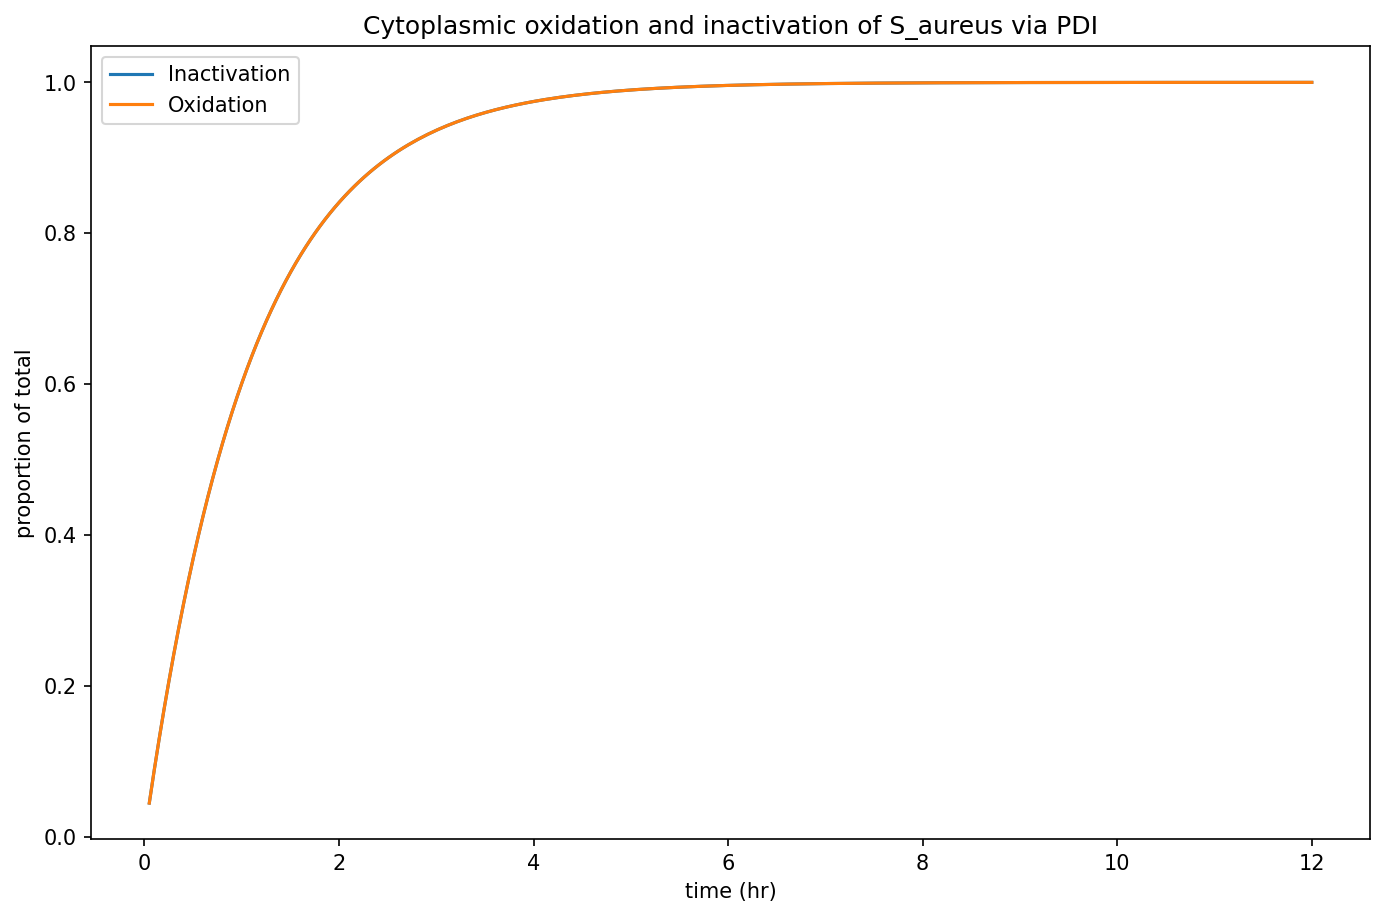

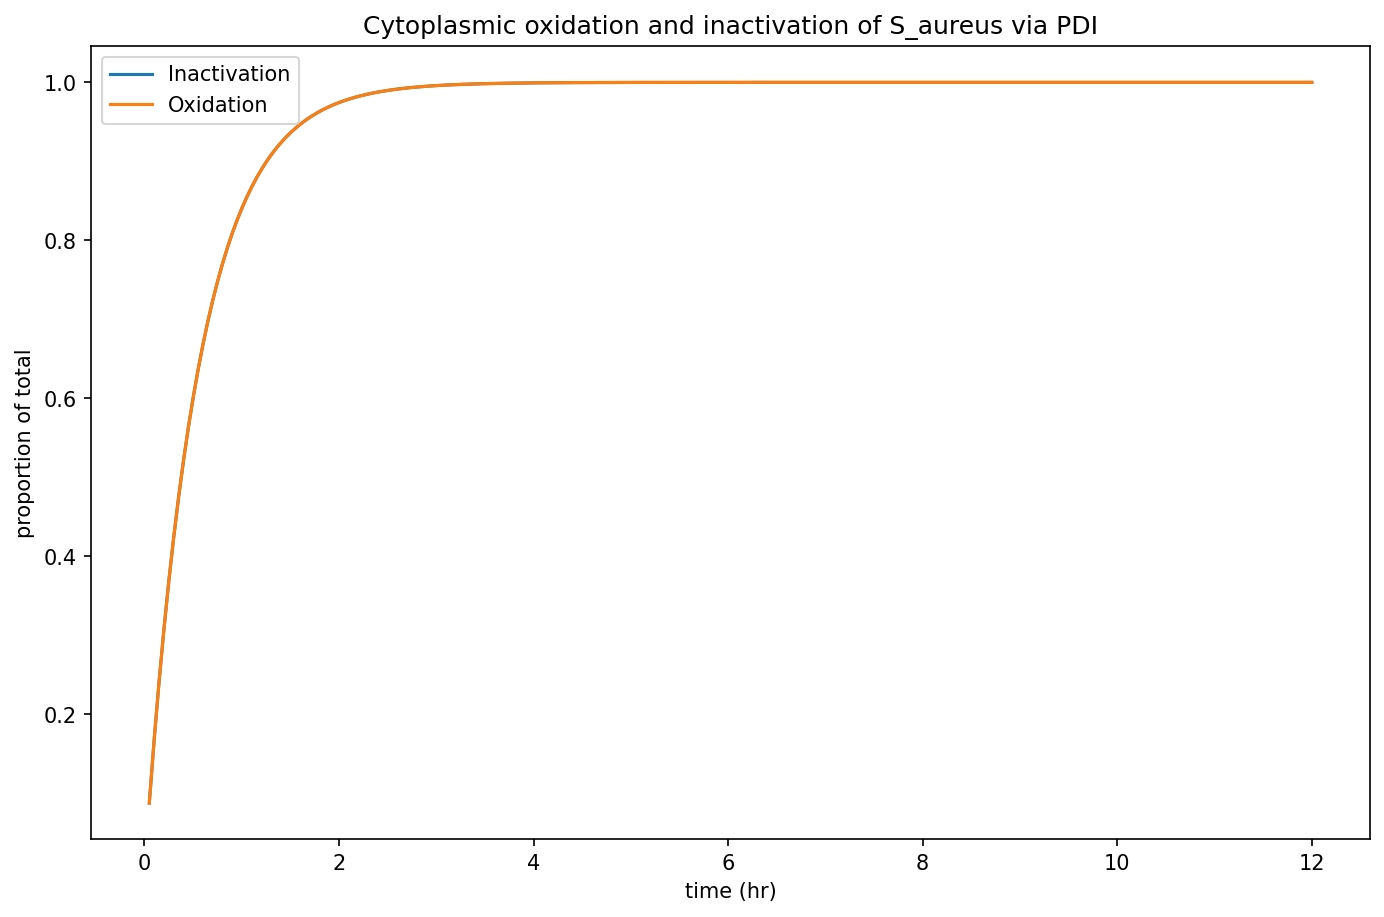

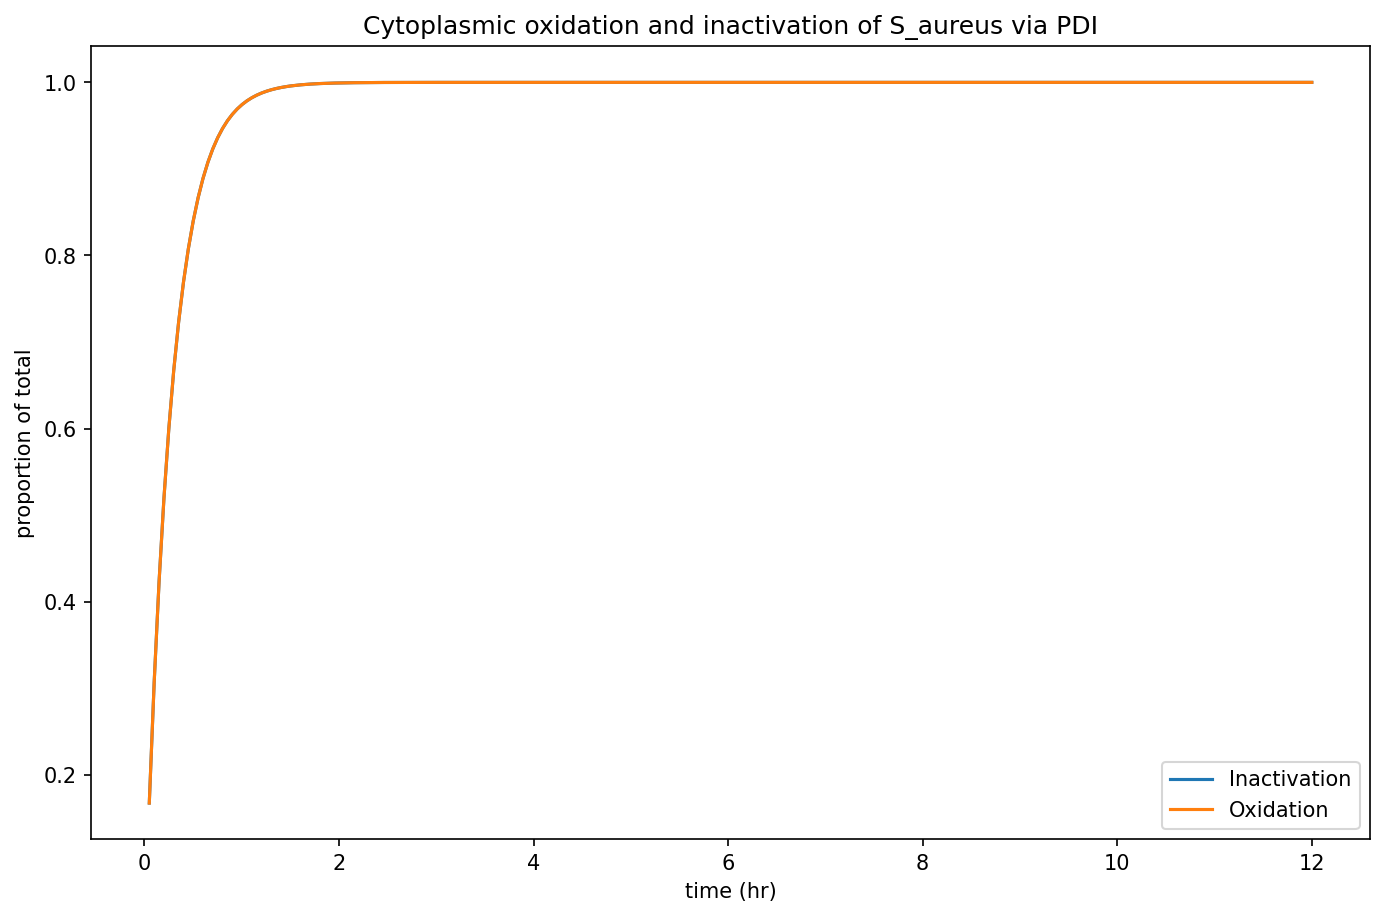

In [28]:
from scipy.constants import micro
from uncertainties import ufloat
%run ../../pdipy/core.py
%matplotlib inline

# define photosensitizer parameters
photosensitizer = {
    'name': '5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide',
    'mw': {
        'value':1186.462   # mass with iodides included, sans iodides 678.84,
    },
    'dimensions':{
        'length (A)': total_length,
        'width (A)': total_length,
        'depth (A)': 1.5,
        'shape': 'disc',
    }
}

# define the light parameters
irradiance = 4
light_source = {
    'name': 'OSRAM 2\' 18W/840 lamps',
    "visible_proportion": {
      "value": (700-390)/(700-380),
    }
}

# define general parameters
verbose = True
jupyter = True
total_time = 720
bacterial_specie = 'S_aureus'
photosensitizer_molars = [5*micro, 10*micro, 20*micro]

# execute the simulation
for photosensitizer_molar in photosensitizer_molars:
    export_name = f'Beirao_et_al, biofilm, {int(photosensitizer_molar/micro)} uM solution'
    
    pdi = PDIBacterialPkg(verbose, jupyter)
    pdi.define_system(total_time, bacterial_cfu_ml = 1E8, biofilm = True)
    pdi.define_bacterium(bacterial_specie)
    pdi.define_photosensitizer(photosensitizer, photosensitizer_molar)
    pdi.define_light(light_source, irradiance)
    pdi.singlet_oxygen_calculations()
    pdi.kinetic_calculation()
    pdi.data_processing()
    pdi.export(export_name)
    display(processed_data)

    # affirm the accuracy of the prediction
    if photosensitizer_molar == 20*micro:
        target_reduction = 1-10**(-6.3)
        value, unit = pdi.data_parsing(target_reduction)    
        print(value, unit)
        actual_value = 6.5
        
    elif photosensitizer_molar == 5*micro:
        target_reduction = 1-10**(-3.6)
        value, unit = pdi.data_parsing(target_reduction)
#         value, unit = pdi.data_parsing(target_time = 6.5)
        print(value, unit)
        actual_value = 6.5
        
    elif photosensitizer_molar == 10*micro:
        target_reduction = 1-10**(-5)
        value, unit = pdi.data_parsing(target_reduction)
#         value, unit = pdi.data_parsing(target_time = 6.5)
        print(value, unit)
        actual_value = 6.5
        
    if value is not None:
        tolerance = actual_value*0.5
        acceptable_range = [actual_value-tolerance, actual_value+tolerance]
        acceptable_range_float = ufloat(actual_value, tolerance)
        if acceptable_range[0] < value < acceptable_range[1]:
            print(f'The prediction of {value} is within the {acceptable_range_float} tolerance of the actual value.')
        else:
            print(f'--> ERROR: The prediction of {value} is not within the {acceptable_range_float} tolerance of the actual value.')
    
    print('\n\n\n\n')